In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# Evaluating Statistical Models


So far we have introduced a few statistical (machine learning) models and some performance metrics. From working on the preactical projects, you must have discovered that there are so many aspects of a statistical model that it's hard to compare between different models, as well as the choice of hyper-parameters among a family of model.

In this module, we are going to discuss a few aspects of how to evaluate statistical models. We will start from some commonly used performance metrics, estimating the performance on future data, and some meta framework for model evaluation.

# Outline
---

- What do Statistical Models Do
- Performance metrics
- Errors, in and out of sample 
- Bias-Variance Tradeoff
- Overfitting and model selection
- Cross-validation



# What do Statistical Models Do?

There are (at least) three levels at which we can use statistical models in data analysis: 

- as *summaries of the data*, 
- as *predictors*, and 
- as *simulators*. 

# Data Summarization

Like most descriptive statistics, a statistical model can summarize the data with a set of *parameters*. This can be the lowest and least demanding level usage of a statistical model, which is for **data reduction**, or **compression**. Instead of remembering all the data points on a scatter-plot, say, we’d just remember what the mean and variance of them.

The summary can be in the form of a theoretical distribution (*parametric*) or empirical functions(*non-parametric*).

In [2]:
# Generate dataset
data = np.random.normal(100, 15, 500)
# Calculate statistics
mu = data.mean()
sigma = data.std()
# Calculate PDF from data
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
h = np.histogram(data, bins=x)
# Plot
#print(mu)
#print(sigma)

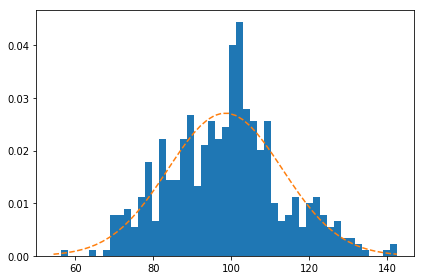

In [3]:
fig, ax = plt.subplots()
n, hx, patches = ax.hist(data, bins=x, density=1)
# Calculate PDF from Gaussian distribution
import scipy.stats as stats
y = stats.norm.pdf(hx, mu, sigma)
ax.plot(hx, y, '--')
plt.tight_layout()
plt.show()

# Prediction

The most well-known usage of machine learning models is **using statistical models for prediction**. Once we formed the knowledge of the joint distribution of our data, we can predict variables described by the model.

Most **evaluation** techniques are designed based on the performance of predictions. 



# Simulation

Once the parameters of the statistical models are learned from the data, we can use the model to *generate / simulate* new data. If we train our model with the *Bayesian* approach, then *simulation* is inluded in the learning process. Due to the success of deep convolutional neural network, the generative statistical models are now widely applied to generate digital contents, such as [GPT-2](https://openai.com/blog/better-language-models/), [MuseNet](https://openai.com/blog/musenet/), and [Deepfake](https://en.wikipedia.org/wiki/Deepfake).

<img src="https://cdn.vox-cdn.com/thumbor/nKhCSXmFymvUPS8Rf1NuMcSFAZQ=/800x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/16226452/dali.gif" height="200"/>

# Common Performance Metrics for Classification

- Confusion matrix
  - Accuracy
  - Precision
  - Recall
  - Specificity
  - F1 score
- Precision-Recall or PR curve
- ROC (Receiver Operating Characteristics) curve
- PR vs ROC curve.


# Confusion Matrix

In statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

<img src='figures/confusion_matrix.png' />

Many metrics can be derived from this confusion metrics, and [the wikipedia entry](https://en.wikipedia.org/wiki/Confusion_matrix) has a complete list of them.

# Accuracy, Precision, Recall, and F-1

- **Accuracy**: the probability of being correct. 
  - $\frac{TP+TN}{TP+FP+TN+FN}$

- **Precision**: the probability of being correct when predicting true. 
  - $\frac{TP+}{TP+FP}$
  - PPV (Positive Predictive Value)

- **Recall**: the probability of being correct when actually true. 
  - $\frac{TP+}{TP+FN}$
  - Sensitivity, TPR (True Positive Rate)

- **F-1 socre**: the harmonic mean of **precision** and **recall**, a balanced measure.
  - $\frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{2*precision*recall}{precision+recall}$


# PR (Precision-Recall) Curve

<img src='figures/pr_curve.png' />

# ROC  (Receiver Operating Characteristics) Curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

<img src='figures/roc_curve.png' />

# Metrics for Regression problems

- RMSE (Root Mean Squared Error)
  - $\sqrt{\frac{1}{n} \sum{(y_i - \hat y_i)^2}}$


- MAE (Mean Absolute Error)
  - $\frac{1}{n} \sum{|y_i - \hat y_i|}$


- $R^2$, Coefficient of determination, Explained Variance
  - $1 - SS_{res} / SS_{tot}= 1 - \sum{(y_i - \hat y_i)^2} / \sum{(y_i - \bar y)^2}$



# Deriving Performance Metrics in Practice

The package [`scikit-learn`](https://scikit-learn.org/stable/modules/model_evaluation.html) provides a thourough list of performance metrics, so that it's rather easy to use in practice. Let's see some examples.

In [44]:
# Create data
y_true = np.random.randint(0,2,size=1000)
y_pred = np.copy(y_true)
# Sample 10% of data to flip
idx_flip = np.random.choice(range(len(y_true)), size=100)
y_pred[idx_flip] = np.abs(y_true[idx_flip]-1)
y2 = np.copy(y_pred)
y2[idx_flip+1] = np.abs(y_pred[idx_flip+1]-1)
y3 = np.copy(y2)
y3[idx_flip+2] = np.abs(y2[idx_flip+2]-1)
#print(idx_flip)
#print(y_true)
#print(y_pred)
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[439,  40],
       [ 56, 465]])

In [32]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[461  47]
 [ 49 443]]


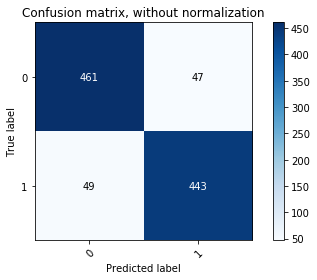

 Accuracy: 0.904
 Precision: 0.9040816326530612
 Recall: 0.9004065040650406
 F1 score: 0.9022403258655803


In [34]:
plot_confusion_matrix(y_true, y_pred)
plt.show()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(' Accuracy: '+ str(accuracy_score(y_true, y_pred)))
print(' Precision: ' + str(precision_score(y_true, y_pred)))
print(' Recall: ' + str(recall_score(y_true, y_pred)))
print(' F1 score: ' + str(f1_score(y_true, y_pred)))

[0.         0.08350731 1.        ]
[0.        0.8925144 1.       ]
[2 1 0]
0.9045035442520607


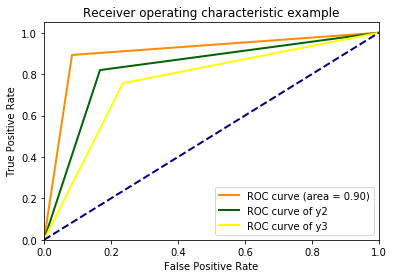

In [48]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
print(fpr)
print(tpr)
print(thresholds)
fpr2, tpr2, thresholds2 = roc_curve(y_true, y2)
fpr3, tpr3, thresholds3 = roc_curve(y_true, y3)
# Compute ROC curve and ROC area for each class
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='darkgreen', lw=2, label='ROC curve of y2')
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='ROC curve of y3')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Errors, in and out of sample

# [Understanding the Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

